# `UCB1-Tuned`


#### A fórmula do UCB1 é dada por:

<br>

![alt_text](https://miro.medium.com/max/720/1*bNRDUK-v1StVARLVJLY8KQ.webp)



<br><br>

#### No caso do UCB1-Tuned, trocaremos o segundo termo da fórmula, que controla o tamanho da margem de erro de escolha, pelo seguinte termo:

<br>

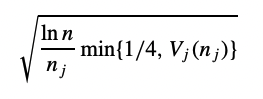


<br>

#### Onde V(n) pode ser dado por:

<br>

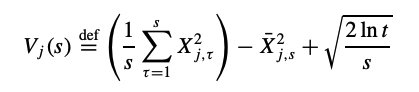

<br><br><br>

#### O UCB1-Tuned tem sido muito utilizado pois, em testes empíricos, performa muito melhor do que o UCB1!! Vamos ver isso na prática :)

Vamos ver as implementações do `UCB1` e `UCB1-Tuned` do pacote `mabalgs`. Esse é um projeto do `Alison Carrera`, e tem sido utilizado em muitas empresas para implementação de MAB's. Vamos ver como funciona!

https://github.com/alison-carrera/mabalgs

In [1]:
# !pip install mabalgs

Primeiro, vamos importar um simulador de resultados. Com ele, poderemos simular como dados reais se comportariam e como os algoritmos conseguem reagir a eles, a cada escolha de arms. Ao fim, vamos comparar suas performances.

In [2]:
from mab import simulator

In [3]:
import matplotlib.pyplot as plt

Agora, vamos definir as médias de reward de cada arm. A ideia é que os algoritmos consigam entender qual arm retorna as melhores recompensas em média e consiga escolhê-la majoritariamente.

In [4]:
means = {0: [0.9, 0.15, 0.2, 0.25, 0.3]}

number_of_pulls = 6000
number_of_simulation = 500

Agora, vamos instanciar duas simuladores, um para o UCB1 e outro para o UCB1-Tuned

In [5]:
mcs_ucb1 = simulator.MonteCarloSimulator()

In [6]:
mcs_ucb1_tuned = simulator.MonteCarloSimulator()

Então, rodamos os algoritmos utilizando as simulações

In [9]:
# mcs_ucb1.run?

In [10]:
results_ucb1 = mcs_ucb1.run("ucb1", means, number_of_simulation, number_of_pulls)

In [11]:
results_ucb1_tuned = mcs_ucb1_tuned.run("ucb1", means, number_of_simulation, number_of_pulls)

#### Vamos ver como ficam os resultados do UCB1

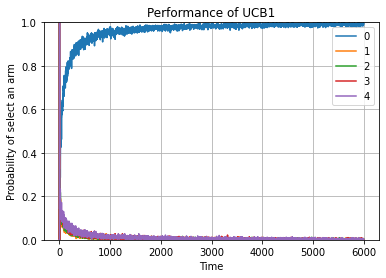

In [10]:
plt.ylim(0.0, 1.0)
plt.title('Performance of UCB1')
plt.xlabel('Time')
plt.ylabel('Probability of select an arm')
plt.plot(range(results_ucb1[1]), results_ucb1[2][:,0], label='0')
plt.plot(range(results_ucb1[1]), results_ucb1[2][:,1], label='1')
plt.plot(range(results_ucb1[1]), results_ucb1[2][:,2], label='2')
plt.plot(range(results_ucb1[1]), results_ucb1[2][:,3], label='3')
plt.plot(range(results_ucb1[1]), results_ucb1[2][:,4], label='4')
plt.legend()
plt.grid(True)

plt.show()

#### Vamos ver como ficam os resultados do UCB1-Tuned

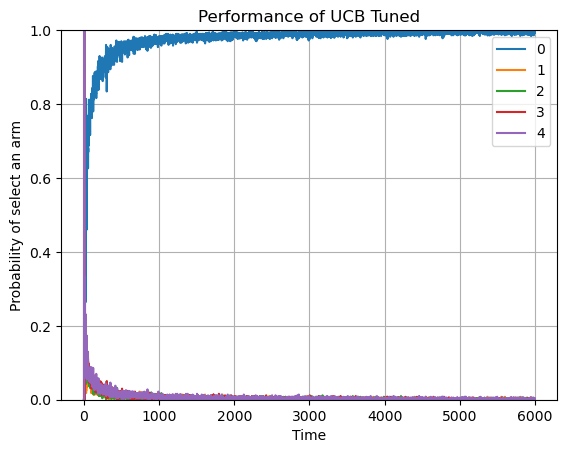

In [12]:
plt.ylim(0.0, 1.0)
plt.title('Performance of UCB Tuned')
plt.xlabel('Time')
plt.ylabel('Probability of select an arm')
plt.plot(range(results_ucb1_tuned[1]), results_ucb1_tuned[2][:,0], label='0')
plt.plot(range(results_ucb1_tuned[1]), results_ucb1_tuned[2][:,1], label='1')
plt.plot(range(results_ucb1_tuned[1]), results_ucb1_tuned[2][:,2], label='2')
plt.plot(range(results_ucb1_tuned[1]), results_ucb1_tuned[2][:,3], label='3')
plt.plot(range(results_ucb1_tuned[1]), results_ucb1_tuned[2][:,4], label='4')
plt.legend()
plt.grid(True)

plt.show()

#### E como fica a comparação das recompensas obtidas pelo UCB1 e UCB1-Tuned ao longo do tempo?

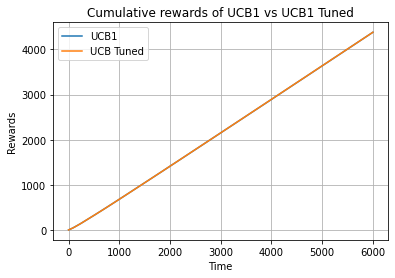

In [12]:
plt.title('Cumulative rewards of UCB1 vs UCB1 Tuned')
plt.xlabel('Time')
plt.ylabel('Rewards')
plt.plot(range(results_ucb1[1]), results_ucb1[3], label='UCB1')
plt.plot(range(results_ucb1_tuned[1]), results_ucb1_tuned[3], label='UCB Tuned')
plt.legend()
plt.grid(True)

plt.show()

#### E como fica a comparação das recompensas obtidas pelo UCB1 e UCB1-Tuned acumuladas?

In [13]:
print('Cumulative Rewards for UCB1: {}'.format(results_ucb1[3][-1]))
print('Cumulative Rewards for UCB Tuned: {}'.format(results_ucb1_tuned[3][-1]))

Cumulative Rewards for UCB1: 5298.25400000011
Cumulative Rewards for UCB Tuned: 5295.926000000103
